In [62]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import svm
from sklearn.preprocessing import RobustScaler, OrdinalEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from yellowbrick.classifier import confusion_matrix
from sklearn.decomposition import PCA
from xgboost import XGBClassifier
from sklearn.metrics import make_scorer
from sklearn.model_selection import GridSearchCV
from imblearn.over_sampling import SMOTE

In [63]:
df = pd.read_csv('../data/socio.csv')

In [64]:
df['_id'].value_counts()

_id
1       1
3331    1
3338    1
3337    1
3336    1
       ..
1667    1
1666    1
1665    1
1664    1
4999    1
Name: count, Length: 4999, dtype: int64

In [65]:
df.columns

Index(['_id', 'tempo_de_assinatura', 'historico_de_presenca_nos_jogos',
       'historico_de_socio', 'numero_de_desistencias_no_periodo',
       'historico_de_preco_nos_planos', 'tipo_de_plano', 'quantos_membros',
       'planos_com_ingresso_incluso', 'estado_civil', 'risco_de_churn',
       'feedback_sobre_servicos', 'frequencia_de_compra_de_produtos',
       'tipo_pagamento', 'recorrencia', 'renda_mensal'],
      dtype='object')

In [66]:
df['risco_de_churn'] = df['risco_de_churn'].replace('medio', 'médio')
df['risco_de_churn'] = df['risco_de_churn'].replace({'baixo': 0, 'médio': 1, 'alto': 1})

df['risco_de_churn']

/tmp/ipykernel_1759/3704502724.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['risco_de_churn'] = df['risco_de_churn'].replace({'baixo': 0, 'médio': 1, 'alto': 1})


0       1
1       1
2       1
3       0
4       1
       ..
4994    1
4995    0
4996    1
4997    0
4998    1
Name: risco_de_churn, Length: 4999, dtype: int64

In [67]:
df

,_id,tempo_de_assinatura,historico_de_presenca_nos_jogos,historico_de_socio,numero_de_desistencias_no_periodo,historico_de_preco_nos_planos,tipo_de_plano,quantos_membros,planos_com_ingresso_incluso,estado_civil,risco_de_churn,feedback_sobre_servicos,frequencia_de_compra_de_produtos,tipo_pagamento,recorrencia,renda_mensal
0,1,39,71,11,4,134,familiar,4,sim,solteiro,1,3,0,boleto,False,2501-5000
1,2,52,60,1,1,219,familiar,3,sim,divorciado,1,1,3,pix,False,2501-5000
2,3,29,20,4,3,435,individual,4,nao,casado,1,4,5,pix,False,1501-2500
3,4,15,82,8,1,386,individual,4,sim,solteiro,0,2,10,pix,False,1501-2500
4,5,43,86,3,3,239,individual,1,sim,casado,1,8,2,boleto,False,0-1500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4994,4995,25,55,31,0,263,individual,5,sim,divorciado,1,4,3,cartão de débito,True,1501-2500
4995,4996,73,56,5,6,211,individual,4,nao,solteiro,0,10,14,boleto,False,2501-5000
4996,4997,1,42,23,3,120,familiar,3,sim,solteiro,1,9,3,cartão de crédito,True,1501-2500
4997,4998,3,41,16,4,64,individual,4,sim,divorciado,0,1,5,boleto,False,1501-2500


In [68]:
X = df.drop(['risco_de_churn','_id'], axis=1)
y=df['risco_de_churn']

In [69]:
colunas_numericas = X.select_dtypes(include=['float64', 'int64']).columns
scaler = RobustScaler()
X[colunas_numericas] = scaler.fit_transform(X[colunas_numericas])
X

,tempo_de_assinatura,historico_de_presenca_nos_jogos,historico_de_socio,numero_de_desistencias_no_periodo,historico_de_preco_nos_planos,tipo_de_plano,quantos_membros,planos_com_ingresso_incluso,estado_civil,feedback_sobre_servicos,frequencia_de_compra_de_produtos,tipo_pagamento,recorrencia,renda_mensal
0,-0.093023,0.891892,-0.368421,-0.2,-0.457490,familiar,0.00,sim,solteiro,-0.333333,-0.833333,boleto,False,2501-5000
1,0.209302,0.594595,-0.894737,-0.8,-0.113360,familiar,-0.25,sim,divorciado,-0.666667,-0.333333,pix,False,2501-5000
2,-0.325581,-0.486486,-0.736842,-0.4,0.761134,individual,0.00,nao,casado,-0.166667,0.000000,pix,False,1501-2500
3,-0.651163,1.189189,-0.526316,-0.8,0.562753,individual,0.00,sim,solteiro,-0.500000,0.833333,pix,False,1501-2500
4,0.000000,1.297297,-0.789474,-0.4,-0.032389,individual,-0.75,sim,casado,0.500000,-0.500000,boleto,False,0-1500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4994,-0.418605,0.459459,0.684211,-1.0,0.064777,individual,0.25,sim,divorciado,-0.166667,-0.333333,cartão de débito,True,1501-2500
4995,0.697674,0.486486,-0.684211,0.2,-0.145749,individual,0.00,nao,solteiro,0.833333,1.500000,boleto,False,2501-5000
4996,-0.976744,0.108108,0.263158,-0.4,-0.514170,familiar,-0.25,sim,solteiro,0.666667,-0.333333,cartão de crédito,True,1501-2500
4997,-0.930233,0.081081,-0.105263,-0.2,-0.740891,individual,0.00,sim,divorciado,-0.666667,0.000000,boleto,False,1501-2500


In [70]:
colunas_categoricas = df.select_dtypes(include=['object']).columns

In [71]:
ohe = OneHotEncoder()
X_encoded = ohe.fit_transform(X[colunas_categoricas])
X_encoded = pd.DataFrame(X_encoded.toarray(), columns=ohe.get_feature_names_out(colunas_categoricas))
X = pd.concat([X, X_encoded], axis=1).drop(colunas_categoricas, axis=1)

In [72]:
X

,tempo_de_assinatura,historico_de_presenca_nos_jogos,historico_de_socio,numero_de_desistencias_no_periodo,historico_de_preco_nos_planos,quantos_membros,feedback_sobre_servicos,frequencia_de_compra_de_produtos,recorrencia,tipo_de_plano_familiar,...,tipo_pagamento_boleto,tipo_pagamento_cartão de crédito,tipo_pagamento_cartão de débito,tipo_pagamento_pix,renda_mensal_0-1500,renda_mensal_10001-20000,renda_mensal_1501-2500,renda_mensal_20001+,renda_mensal_2501-5000,renda_mensal_5001-10000
0,-0.093023,0.891892,-0.368421,-0.2,-0.457490,0.00,-0.333333,-0.833333,False,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.209302,0.594595,-0.894737,-0.8,-0.113360,-0.25,-0.666667,-0.333333,False,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2,-0.325581,-0.486486,-0.736842,-0.4,0.761134,0.00,-0.166667,0.000000,False,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
3,-0.651163,1.189189,-0.526316,-0.8,0.562753,0.00,-0.500000,0.833333,False,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
4,0.000000,1.297297,-0.789474,-0.4,-0.032389,-0.75,0.500000,-0.500000,False,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4994,-0.418605,0.459459,0.684211,-1.0,0.064777,0.25,-0.166667,-0.333333,True,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4995,0.697674,0.486486,-0.684211,0.2,-0.145749,0.00,0.833333,1.500000,False,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4996,-0.976744,0.108108,0.263158,-0.4,-0.514170,-0.25,0.666667,-0.333333,True,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4997,-0.930233,0.081081,-0.105263,-0.2,-0.740891,0.00,-0.666667,0.000000,False,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [73]:
def model_evaluation(y_pred,y_test,y_train,x_train,x_test,model):
    '''
    This function aims to show the main model evaluation metrics (accuracy, recall, precision and f1), as well as the confusion matrix.
    '''
    # Accuracy: The overall percentage of correct predictions made by the model
    accuracy = accuracy_score(y_test, y_pred)
    print(f'Acuracy: {accuracy:.4f}. (The overall percentage of correct predictions made by the model)')

    # Precision: The ratio of correct positive predictions to the total positive predictions made by the model
    precision = precision_score(y_test, y_pred)
    print(f'Precision: {precision:.4f}(The ratio of correct positive predictions to the total positive predictions made by the model)')

    # Recall: The ratio of correct positive predictions to the total actual positive cases
    recall = recall_score(y_test, y_pred)
    print(f'Recall: {recall:.4f} (The ratio of correct positive predictions to the total actual positive cases.)')

    # F1-score: A metric that combines precision and recall into a single measure, useful when there is an imbalance between classes
    f1 = f1_score(y_test, y_pred)
    print(f'F1-score: {f1:.4f} ( A metric that combines precision and recall into a single measure, useful when there is an imbalance between classes)')

    #Confusion metrix
    cm = confusion_matrix(model,x_train,y_train,x_test,y_test)
    cm.show;

In [74]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

Acuracy: 0.6520. (The overall percentage of correct predictions made by the model)
Precision: 0.6520(The ratio of correct positive predictions to the total positive predictions made by the model)
Recall: 1.0000 (The ratio of correct positive predictions to the total actual positive cases.)
F1-score: 0.7893 ( A metric that combines precision and recall into a single measure, useful when there is an imbalance between classes)


/home/giovane/.pyenv/versions/lewagon/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


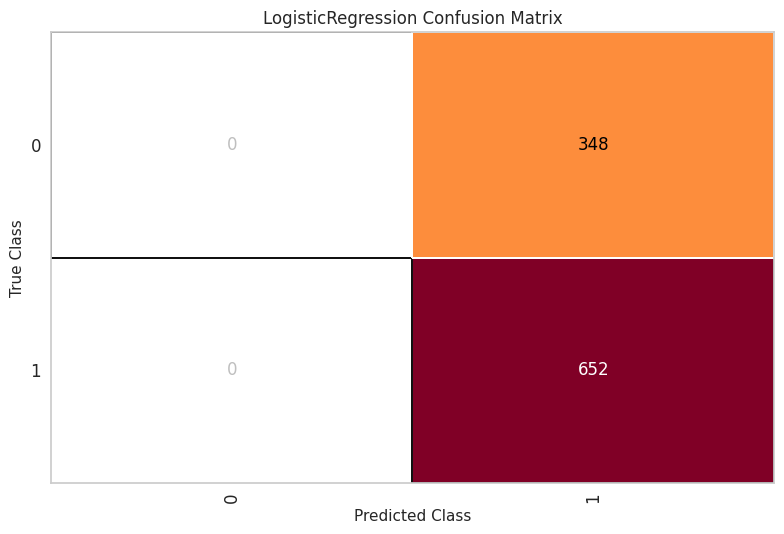

In [75]:
lg= LogisticRegression()
lg.fit(x_train, y_train)

# Making predictions
y_pred = lg.predict(x_test)

# Evaluating the model
model_evaluation(y_pred,y_test,y_train,x_train,x_test,lg)

Acuracy: 0.5920. (The overall percentage of correct predictions made by the model)
Precision: 0.6491(The ratio of correct positive predictions to the total positive predictions made by the model)
Recall: 0.8144 (The ratio of correct positive predictions to the total actual positive cases.)
F1-score: 0.7224 ( A metric that combines precision and recall into a single measure, useful when there is an imbalance between classes)


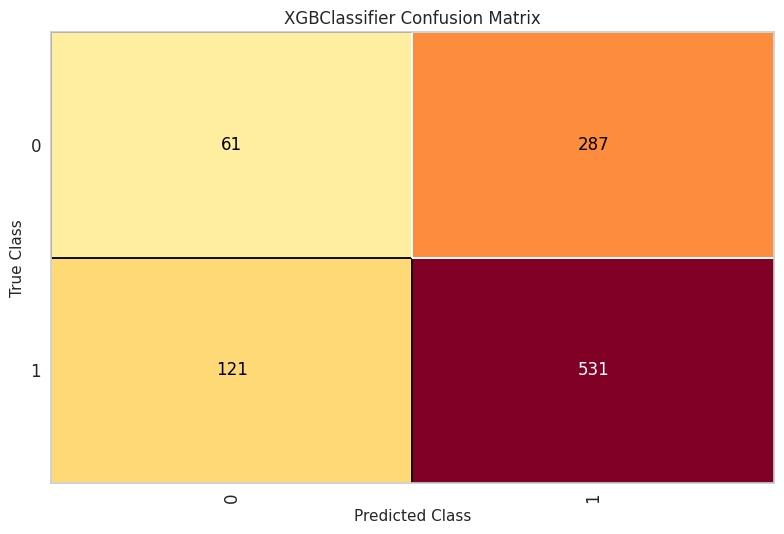

In [76]:

model_xgb = XGBClassifier(objective='binary:logistic',  random_state=42)

model_xgb.fit(x_train, y_train)

y_pred = model_xgb.predict(x_test)

model_evaluation(y_pred,y_test,y_train,x_train,x_test,model_xgb)

In [77]:
y_pred = model_xgb.predict_proba(x_test)
y_pred

array([[0.18806046, 0.81193954],
       [0.63402474, 0.36597526],
       [0.3202864 , 0.6797136 ],
       ...,
       [0.16442537, 0.8355746 ],
       [0.42728513, 0.57271487],
       [0.401906  , 0.598094  ]], dtype=float32)

In [78]:
# param_grid = {
#     'learning_rate': [0.1, 0.01, 0.001],
#     'n_estimators': [100, 200, 300],
#     'max_depth': [3, 4, 5],
# }
# xgb_model = XGBClassifier()

# # Crie um objeto GridSearchCV
# grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, scoring='accuracy', cv=5)

# # Ajuste o modelo aos dados de treinamento
# grid_search.fit(x_train, y_train)

# # Obtenha os melhores hiperparâmetros encontrados
# best_params = grid_search.best_params_

# # Obtenha o modelo com os melhores hiperparâmetros
# best_xgb_model = grid_search.best_estimator_

# # Faça previsões no conjunto de teste
# y_pred = best_xgb_model.predict(x_test)

# # Avalie o desempenho do modelo
# accuracy = accuracy_score(y_test, y_pred)
# print(f'Acurácia no conjunto de teste: {accuracy:.4f}')

# # Exiba os melhores hiperparâmetros encontrados
# print("Melhores hiperparâmetros:")
# print(best_params)

Acuracy: 0.5600. (The overall percentage of correct predictions made by the model)
Precision: 0.6395(The ratio of correct positive predictions to the total positive predictions made by the model)
Recall: 0.7454 (The ratio of correct positive predictions to the total actual positive cases.)
F1-score: 0.6884 ( A metric that combines precision and recall into a single measure, useful when there is an imbalance between classes)


/home/giovane/.pyenv/versions/lewagon/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/giovane/.pyenv/versions/lewagon/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(


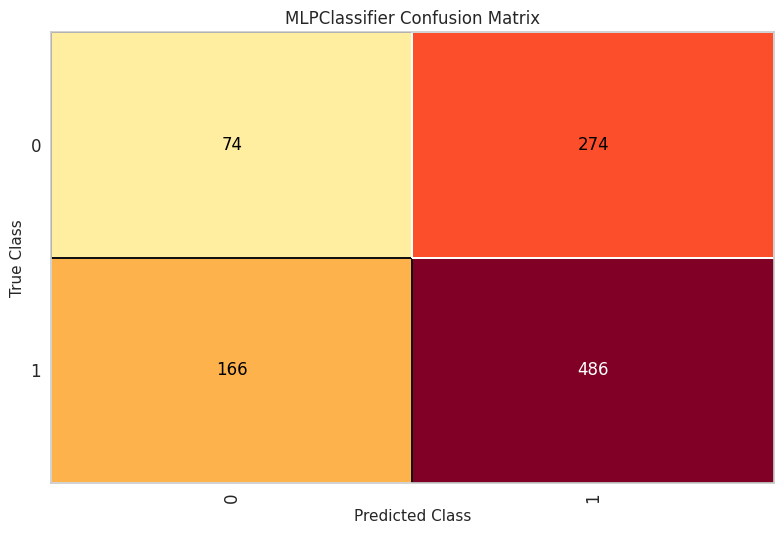

In [79]:
model_nn = MLPClassifier(hidden_layer_sizes=(100,), max_iter=500, random_state=42)

model_nn.fit(x_train, y_train)

y_pred = model_nn.predict(x_test)

model_evaluation(y_pred,y_test,y_train,x_train,x_test,model_nn)

Acuracy: 0.6390. (The overall percentage of correct predictions made by the model)
Precision: 0.6492(The ratio of correct positive predictions to the total positive predictions made by the model)
Recall: 0.9709 (The ratio of correct positive predictions to the total actual positive cases.)
F1-score: 0.7781 ( A metric that combines precision and recall into a single measure, useful when there is an imbalance between classes)


/home/giovane/.pyenv/versions/lewagon/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


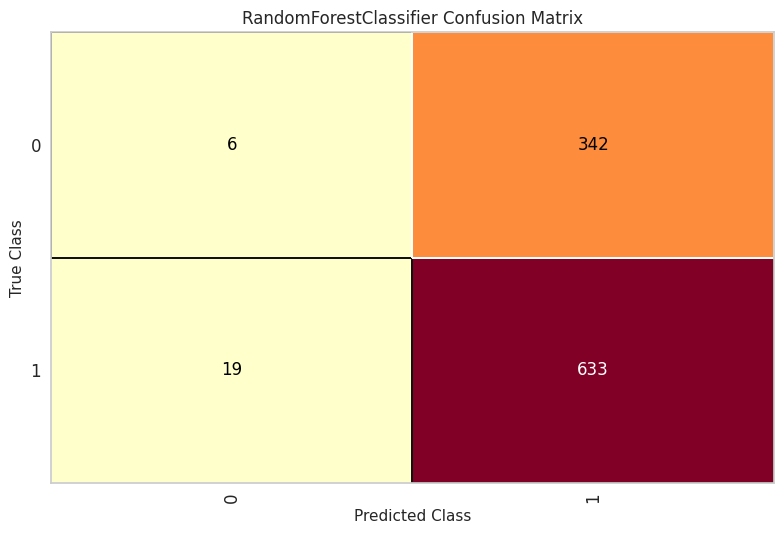

In [80]:
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(x_train, y_train)

# Making predictions
y_pred = rf.predict(x_test)

# Evaluating the model
model_evaluation(y_pred,y_test,y_train,x_train,x_test,rf)

Acuracy: 0.6520. (The overall percentage of correct predictions made by the model)
Precision: 0.6520(The ratio of correct positive predictions to the total positive predictions made by the model)
Recall: 1.0000 (The ratio of correct positive predictions to the total actual positive cases.)
F1-score: 0.7893 ( A metric that combines precision and recall into a single measure, useful when there is an imbalance between classes)


/home/giovane/.pyenv/versions/lewagon/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


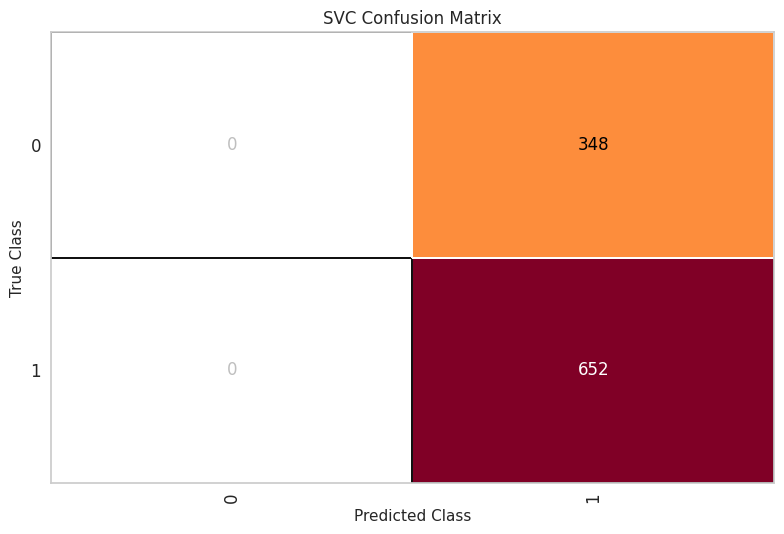

In [81]:
model_svm = svm.SVC(kernel='linear')
model_svm.fit(x_train, y_train)

y_pred = model_svm.predict(x_test)

model_evaluation(y_pred,y_test,y_train,x_train,x_test,model_svm)

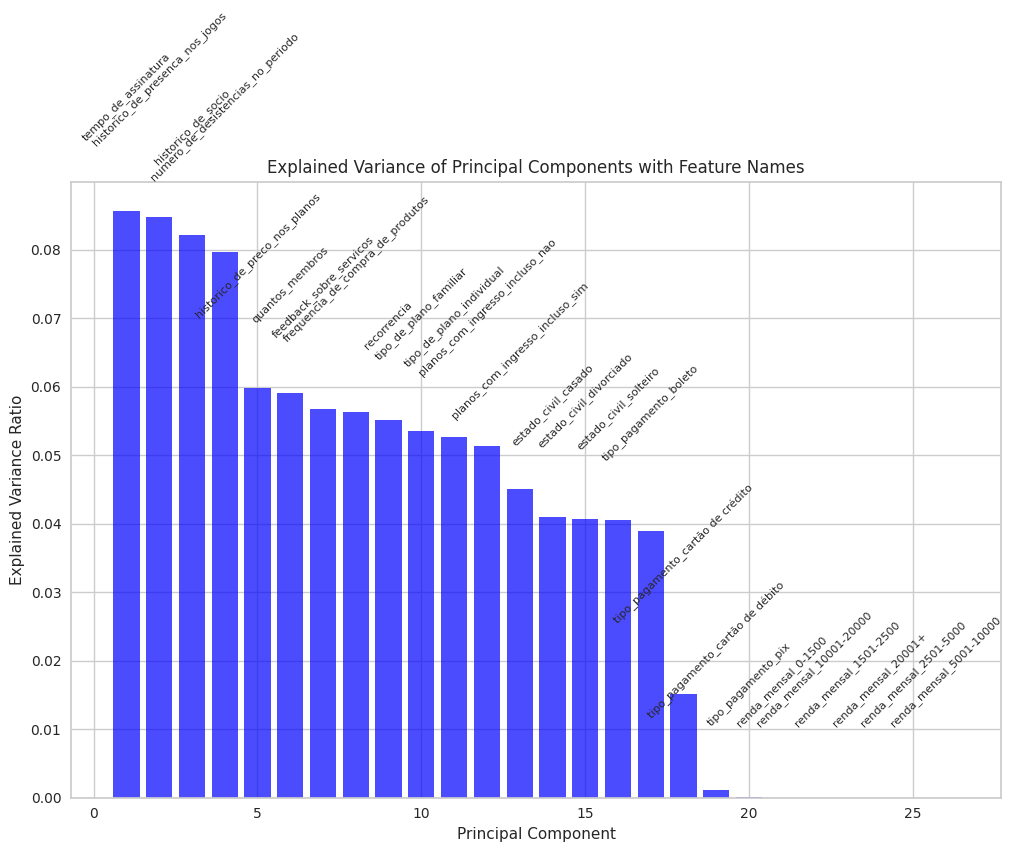

In [82]:
# Apply Principal Component Analysis (PCA) to reduce dimensionality
pca = PCA()
X_pca = pca.fit_transform(X)

# Retrieve the explained variance ratio for each principal component
explained_variance_ratio = pca.explained_variance_ratio_

# Create a DataFrame to store principal component, explained variance ratio, and corresponding feature names
df_var_exp = pd.DataFrame({'Principal Component': range(1, len(explained_variance_ratio) + 1),
                            'Explained Variance Ratio': explained_variance_ratio,
                            'Feature': X.columns})

# Create a bar plot to visualize the explained variance of each principal component with feature names
plt.figure(figsize=(12, 8))
bars = plt.bar(df_var_exp['Principal Component'], df_var_exp['Explained Variance Ratio'], color='blue', alpha=0.7)

# Add feature names as labels to the bars
for bar, feature in zip(bars, df_var_exp['Feature']):
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.01, feature, ha='center', va='bottom', rotation=45, fontsize=8)

# Set plot labels and title
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.title('Explained Variance of Principal Components with Feature Names')
plt.show()

In [83]:
from sklearn.cluster import KMeans
km = KMeans(n_clusters=5)
km.fit(X)


/home/giovane/.pyenv/versions/lewagon/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=5)

In [84]:
X['cluster']=km.labels_

In [85]:
X

,tempo_de_assinatura,historico_de_presenca_nos_jogos,historico_de_socio,numero_de_desistencias_no_periodo,historico_de_preco_nos_planos,quantos_membros,feedback_sobre_servicos,frequencia_de_compra_de_produtos,recorrencia,tipo_de_plano_familiar,...,tipo_pagamento_cartão de crédito,tipo_pagamento_cartão de débito,tipo_pagamento_pix,renda_mensal_0-1500,renda_mensal_10001-20000,renda_mensal_1501-2500,renda_mensal_20001+,renda_mensal_2501-5000,renda_mensal_5001-10000,cluster
0,-0.093023,0.891892,-0.368421,-0.2,-0.457490,0.00,-0.333333,-0.833333,False,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,4
1,0.209302,0.594595,-0.894737,-0.8,-0.113360,-0.25,-0.666667,-0.333333,False,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,4
2,-0.325581,-0.486486,-0.736842,-0.4,0.761134,0.00,-0.166667,0.000000,False,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1
3,-0.651163,1.189189,-0.526316,-0.8,0.562753,0.00,-0.500000,0.833333,False,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,4
4,0.000000,1.297297,-0.789474,-0.4,-0.032389,-0.75,0.500000,-0.500000,False,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4994,-0.418605,0.459459,0.684211,-1.0,0.064777,0.25,-0.166667,-0.333333,True,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,3
4995,0.697674,0.486486,-0.684211,0.2,-0.145749,0.00,0.833333,1.500000,False,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0
4996,-0.976744,0.108108,0.263158,-0.4,-0.514170,-0.25,0.666667,-0.333333,True,1.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,3
4997,-0.930233,0.081081,-0.105263,-0.2,-0.740891,0.00,-0.666667,0.000000,False,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,4


In [86]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

Acuracy: 0.5760. (The overall percentage of correct predictions made by the model)
Precision: 0.6465(The ratio of correct positive predictions to the total positive predictions made by the model)
Recall: 0.7823 (The ratio of correct positive predictions to the total actual positive cases.)
F1-score: 0.7080 ( A metric that combines precision and recall into a single measure, useful when there is an imbalance between classes)


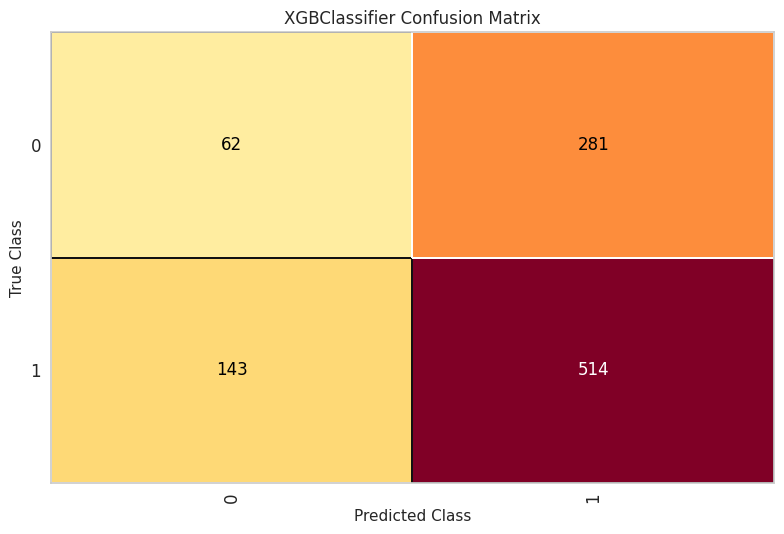

In [87]:

model_xgb = XGBClassifier(objective='binary:logistic',  random_state=42)

model_xgb.fit(x_train, y_train)

y_pred = model_xgb.predict(x_test)

model_evaluation(y_pred,y_test,y_train,x_train,x_test,model_xgb)

In [88]:
# param_grid = {
#     'learning_rate': [0.1, 0.01, 0.001],
#     'n_estimators': [100, 200, 300],
#     'max_depth': [3, 4, 5],
# }
# xgb_model = XGBClassifier()

# # Crie um objeto GridSearchCV
# grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, scoring='accuracy', cv=5)

# # Ajuste o modelo aos dados de treinamento
# grid_search.fit(x_train, y_train)

# # Obtenha os melhores hiperparâmetros encontrados
# best_params = grid_search.best_params_

# # Obtenha o modelo com os melhores hiperparâmetros
# best_xgb_model = grid_search.best_estimator_

# # Faça previsões no conjunto de teste
# y_pred = best_xgb_model.predict(x_test)

# # Avalie o desempenho do modelo
# accuracy = accuracy_score(y_test, y_pred)
# print(f'Acurácia no conjunto de teste: {accuracy:.4f}')

# # Exiba os melhores hiperparâmetros encontrados
# print("Melhores hiperparâmetros:")
# print(best_params)

In [89]:
X.columns

Index(['tempo_de_assinatura', 'historico_de_presenca_nos_jogos',
       'historico_de_socio', 'numero_de_desistencias_no_periodo',
       'historico_de_preco_nos_planos', 'quantos_membros',
       'feedback_sobre_servicos', 'frequencia_de_compra_de_produtos',
       'recorrencia', 'tipo_de_plano_familiar', 'tipo_de_plano_individual',
       'planos_com_ingresso_incluso_nao', 'planos_com_ingresso_incluso_sim',
       'estado_civil_casado', 'estado_civil_divorciado',
       'estado_civil_solteiro', 'tipo_pagamento_boleto',
       'tipo_pagamento_cartão de crédito', 'tipo_pagamento_cartão de débito',
       'tipo_pagamento_pix', 'renda_mensal_0-1500', 'renda_mensal_10001-20000',
       'renda_mensal_1501-2500', 'renda_mensal_20001+',
       'renda_mensal_2501-5000', 'renda_mensal_5001-10000', 'cluster'],
      dtype='object')

In [90]:
# pca = PCA()
# X_pca = pca.fit_transform(X)

# # Retrieve the explained variance ratio for each principal component
# explained_variance_ratio = pca.explained_variance_ratio_

# # Create a DataFrame to store principal component, explained variance ratio, and corresponding feature names
# df_var_exp = pd.DataFrame({'Principal Component': range(1, len(explained_variance_ratio) + 1),
#                             'Explained Variance Ratio': explained_variance_ratio,
#                             'Feature': X.columns})

# # Create a bar plot to visualize the explained variance of each principal component with feature names
# plt.figure(figsize=(12, 8))
# bars = plt.bar(df_var_exp['Principal Component'], df_var_exp['Explained Variance Ratio'], color='blue', alpha=0.7)

# # Add feature names as labels to the bars
# for bar, feature in zip(bars, df_var_exp['Feature']):
#     yval = bar.get_height()
#     plt.text(bar.get_x() + bar.get_width()/2, yval + 0.01, feature, ha='center', va='bottom', rotation=45, fontsize=8)

# # Set plot labels and title
# plt.xlabel('Principal Component')
# plt.ylabel('Explained Variance Ratio')
# plt.title('Explained Variance of Principal Components with Feature Names')
# plt.show()

In [91]:
X.drop(['estado_civil_divorciado',
       'estado_civil_solteiro', 'cluster'], axis=1,inplace=True)

In [92]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

Acuracy: 0.6080. (The overall percentage of correct predictions made by the model)
Precision: 0.6654(The ratio of correct positive predictions to the total positive predictions made by the model)
Recall: 0.8149 (The ratio of correct positive predictions to the total actual positive cases.)
F1-score: 0.7326 ( A metric that combines precision and recall into a single measure, useful when there is an imbalance between classes)


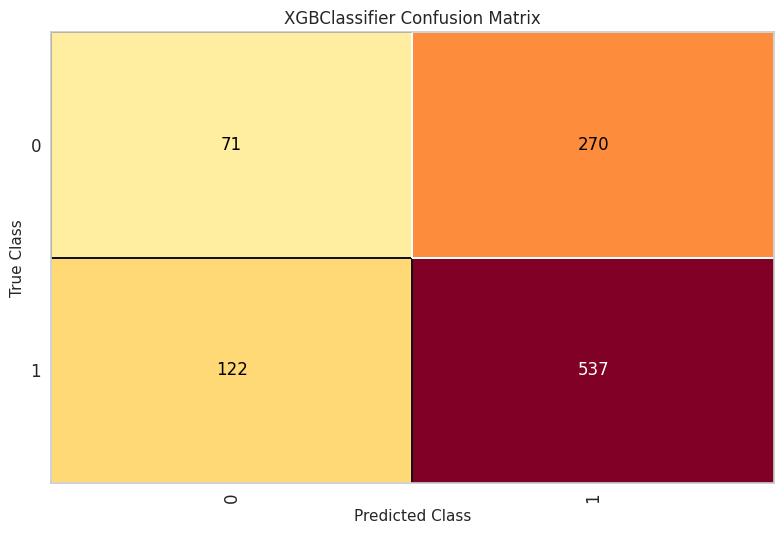

In [93]:

model_xgb = XGBClassifier(objective='binary:logistic',  random_state=42)

model_xgb.fit(x_train, y_train)

y_pred = model_xgb.predict(x_test)

model_evaluation(y_pred,y_test,y_train,x_train,x_test,model_xgb)

In [94]:
# param_grid = {
#     'learning_rate': [0.1, 0.01, 0.001],
#     'n_estimators': [100, 200, 300],
#     'max_depth': [3, 4, 5],
# }
# xgb_model = XGBClassifier()

# # Crie um objeto GridSearchCV
# grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, scoring='accuracy', cv=5)

# # Ajuste o modelo aos dados de treinamento
# grid_search.fit(x_train, y_train)

# # Obtenha os melhores hiperparâmetros encontrados
# best_params = grid_search.best_params_

# # Obtenha o modelo com os melhores hiperparâmetros
# best_xgb_model = grid_search.best_estimator_

# # Faça previsões no conjunto de teste
# y_pred = best_xgb_model.predict(x_test)

# # Avalie o desempenho do modelo
# accuracy = accuracy_score(y_test, y_pred)
# print(f'Acurácia no conjunto de teste: {accuracy:.4f}')

# # Exiba os melhores hiperparâmetros encontrados
# print("Melhores hiperparâmetros:")
# print(best_params)

In [95]:
from sklearn.pipeline import make_pipeline
from sklearn.compose import make_column_transformer, make_column_selector

In [96]:
X = df.drop(['risco_de_churn','_id'], axis=1)
y=df['risco_de_churn']


In [97]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

In [107]:
# Define a column selector for columns with dtype float64
num_col = make_column_selector(dtype_include=['float64', 'int64'])

# Define a column selector for columns excluding float64 (categorical columns)
cat_col = make_column_selector(dtype_exclude=['float64'])

# Create a column transformer with preprocessing steps
preproc = make_column_transformer(
    (RobustScaler(), num_col),    # Scale numerical columns using RobustScaler
    (OneHotEncoder(handle_unknown='ignore'), cat_col),  # Encode categorical columns using OrdinalEncoder
    remainder='passthrough'        # Pass through columns not specified in the num_col or cat_col
)

# Create a pipeline with the defined preprocessing and Logistic Regression as the estimator
pipe = make_pipeline(preproc, XGBClassifier(objective='binary:logistic' , random_state=42))

In [99]:
pipe.get_params

<bound method Pipeline.get_params of Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('robustscaler',
                                                  RobustScaler(),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7f89261ad1e0>),
                                                 ('onehotencoder',
                                                  OneHotEncoder(),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7f89261ac250>)])),
                ('xgbclassifier',
                 XGBClassi...
                               gamma=None, gpu_id=None, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=None,
                               max_bin=None, max_cat

In [100]:
pipe.named_steps.items()

dict_items([('columntransformer', ColumnTransformer(remainder='passthrough',
                  transformers=[('robustscaler', RobustScaler(),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7f89261ad1e0>),
                                ('onehotencoder', OneHotEncoder(),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7f89261ac250>)])), ('xgbclassifier', XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, gamma=None,
              gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, m

In [103]:
x_train

,tempo_de_assinatura,historico_de_presenca_nos_jogos,historico_de_socio,numero_de_desistencias_no_periodo,historico_de_preco_nos_planos,tipo_de_plano,quantos_membros,planos_com_ingresso_incluso,estado_civil,feedback_sobre_servicos,frequencia_de_compra_de_produtos,tipo_pagamento,recorrencia,renda_mensal
162,3,8,2,3,181,individual,4,sim,solteiro,9,2,cartão de crédito,True,1501-2500
2994,8,22,35,4,322,individual,3,sim,solteiro,6,20,cartão de débito,True,1501-2500
4782,41,34,16,2,86,familiar,6,nao,casado,7,11,boleto,False,0-1500
2736,66,52,23,7,257,individual,7,nao,casado,4,3,cartão de crédito,True,0-1500
3134,51,7,13,7,364,individual,4,nao,divorciado,8,4,cartão de débito,True,1501-2500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2319,58,25,15,3,455,familiar,2,sim,divorciado,6,0,cartão de crédito,True,2501-5000
2206,49,13,25,6,44,familiar,6,nao,solteiro,1,8,boleto,False,1501-2500
3474,50,58,31,2,144,individual,1,sim,solteiro,3,4,pix,False,1501-2500
3989,41,12,11,3,202,individual,5,sim,divorciado,4,7,cartão de débito,True,2501-5000


In [108]:
pipe.fit(x_train,y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('robustscaler',
                                                  RobustScaler(),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7f89262f2320>),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7f89262f1750>)])),
                ('x...
                               gamma=0, gpu_id=-1, grow_policy='depthwise',
                               importance_type=None, interaction_constraints='',
                               learning_rate=0.300000012, max_bin=256,
                               max_cat_to_onehot=4, max_delta_step=0,
                               max_depth=6, max_leaves=0, min_child_weight=1,
                               missing=nan, monotone_constraints='()',
                               n_estimators=100, n_jobs=0, num_parallel_tree=1,
                               predictor='auto', random_state=42, reg_alpha=0,
                               reg_lambda=1, ...))])

In [106]:
x_test.dtypes

tempo_de_assinatura                   int64
historico_de_presenca_nos_jogos       int64
historico_de_socio                    int64
numero_de_desistencias_no_periodo     int64
historico_de_preco_nos_planos         int64
tipo_de_plano                        object
quantos_membros                       int64
planos_com_ingresso_incluso          object
estado_civil                         object
feedback_sobre_servicos               int64
frequencia_de_compra_de_produtos      int64
tipo_pagamento                       object
recorrencia                            bool
renda_mensal                         object
dtype: object

In [109]:
y_pred = pipe.predict(x_test)

In [110]:
param_grid = {
    'xgbclassifier__learning_rate': [0.1, 0.01, 0.001],
    'xgbclassifier__n_estimators': [100, 200, 300],
    'xgbclassifier__max_depth': [3, 4, 5],
}

# Crie um objeto GridSearchCV
grid_search = GridSearchCV(estimator=pipe, param_grid=param_grid, scoring='accuracy', cv=5)

# Ajuste o modelo aos dados de treinamento
grid_search.fit(x_train, y_train)

# Obtenha os melhores hiperparâmetros encontrados
best_params = grid_search.best_params_

# Obtenha o modelo com os melhores hiperparâmetros
best_xgb_model = grid_search.best_estimator_

# Faça previsões no conjunto de teste
y_pred = best_xgb_model.predict(x_test)

# Avalie o desempenho do modelo
accuracy = accuracy_score(y_test, y_pred)
print(f'Acurácia no conjunto de teste: {accuracy:.4f}')

# Exiba os melhores hiperparâmetros encontrados
print("Melhores hiperparâmetros:")
print(best_params)

Acurácia no conjunto de teste: 0.6660
Melhores hiperparâmetros:
{'xgbclassifier__learning_rate': 0.01, 'xgbclassifier__max_depth': 3, 'xgbclassifier__n_estimators': 100}


In [111]:
model = grid_search.best_estimator_
model

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('robustscaler',
                                                  RobustScaler(),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7f8924fc7ac0>),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7f8924fc5db0>)])),
                ('x...
                               gamma=0, gpu_id=-1, grow_policy='depthwise',
                               importance_type=None, interaction_constraints='',
                               learning_rate=0.01, max_bin=256,
                               max_cat_to_onehot=4, max_delta_step=0,
                               max_depth=3, max_leaves=0, min_child_weight=1,
                               missing=nan, monotone_constraints='()',
                               n_estimators=100, n_jobs=0, num_parallel_tree=1,
                               predictor='auto', random_state=42, reg_alpha=0,
                               reg_lambda=1, ...))])

In [117]:
import joblib

model_path = '../model/model.pkl'
joblib.dump(model, model_path)


['../model/model.pkl']

In [124]:
linha_1 = df.iloc[0].drop(['risco_de_churn','_id'])
linha_1 = linha_1.to_frame().transpose()


In [128]:
model.predict_proba(linha_1)[0][1]

0.6273864

In [ ]:
# df_teste = pd.read_csv('../data/socio_torcedor.csv')

In [ ]:
# x_test_real = df_teste.drop('risco_de_churn')

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('robustscaler',
                                                  RobustScaler(),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7f3654285e70>),
                                                 ('ordinalencoder',
                                                  OrdinalEncoder(),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7f3654286bf0>)])),
                ('xgbclassifier',
                 XGBClas...
                               gamma=None, gpu_id=None, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=0.01,
                               max_bin=None, max_cat_to_onehot=None,
                               max_delta_step=None, max_depth=3,
                               max_leaves=None, min_child_weight=None,
                               missing=nan, monotone_constraints=None,
                               n_estimators=300, n_jobs=None,
                               num_parallel_tree=None, predictor=None,
                               random_state=42, reg_alpha=None, reg_lambda=None, ...))])

In [ ]:
# colocar os algoritmos no final

<AxesSubplot:xlabel='tempo_de_assinatura', ylabel='historico_de_presenca_nos_jogos'>

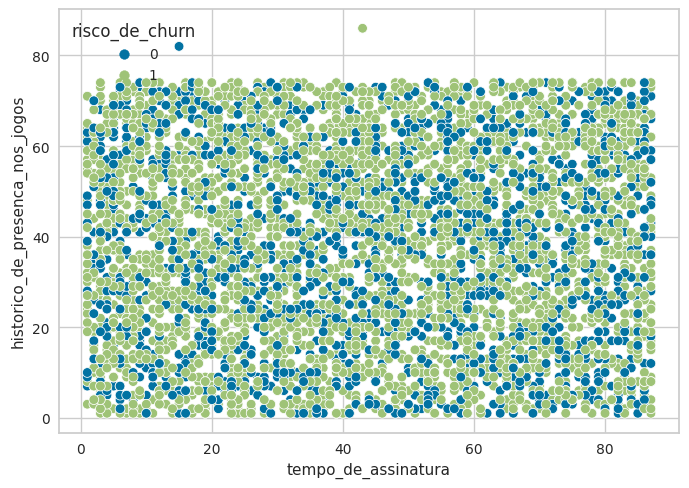

In [ ]:
sns.scatterplot(df,x=df['tempo_de_assinatura'],y=df['historico_de_presenca_nos_jogos'],hue=df['risco_de_churn'])

<AxesSubplot:xlabel='numero_de_desistencias_no_periodo', ylabel='historico_de_socio'>

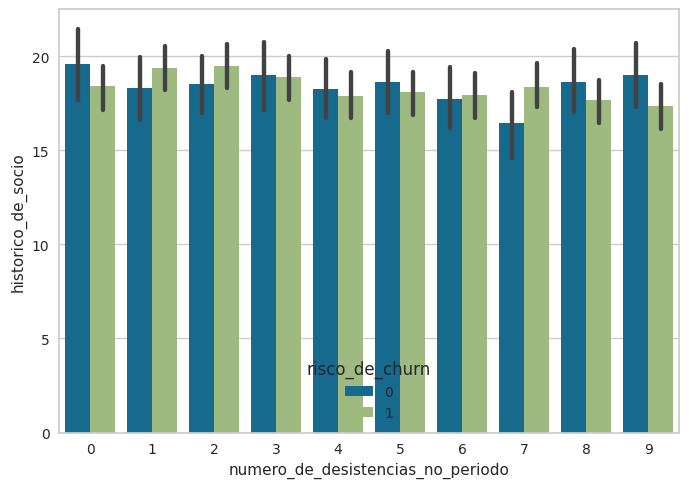

In [ ]:
sns.barplot(df,x=df['numero_de_desistencias_no_periodo'], y=df['historico_de_socio'],hue=df['risco_de_churn'])